In [23]:
from sklearn.cluster import KMeans  
import pandas as pd
import seaborn as sns
data=pd.read_csv("CC GENERAL.csv")

data=data.drop("CUST_ID", axis=1)

data['CREDIT_LIMIT'].fillna((data['CREDIT_LIMIT'].median()), inplace=True)
data['MINIMUM_PAYMENTS'].fillna((data['MINIMUM_PAYMENTS'].median()), inplace=True)


kmeans=KMeans(n_clusters=5, random_state=0)  
kmeans.fit(data)


KMeans(n_clusters=5, random_state=0)

In [19]:
kmeans.predict(data)
print(kmeans.cluster_centers_)   #Printing the coordinates of cluster centers.

[[1.65494809e+03 9.05569473e-01 1.51304429e+03 9.45739817e+02
  5.67698718e+02 8.13031011e+02 5.87831726e-01 3.37622530e-01
  4.07327694e-01 1.14705882e-01 2.66707367e+00 2.15144485e+01
  6.98212713e+03 2.02836865e+03 6.37713650e+02 1.97623568e-01
  1.17659748e+01]
 [4.82080345e+03 9.09931025e-01 1.14382085e+04 8.18784780e+03
  3.25054712e+03 4.99019925e+03 7.68862339e-01 6.29431746e-01
  6.15417508e-01 2.06498992e-01 8.49152542e+00 8.87966102e+01
  1.26572034e+04 1.86548118e+04 2.38130195e+03 3.43899305e-01
  1.18220339e+01]
 [5.61543836e+03 9.61052508e-01 1.38353825e+03 8.42839290e+02
  5.40778189e+02 4.03736821e+03 4.52429864e-01 2.47745180e-01
  3.34396512e-01 3.42575327e-01 1.01538462e+01 1.96213018e+01
  1.08707746e+04 4.01243432e+03 1.95895703e+03 6.38992899e-02
  1.16591716e+01]
 [4.05814769e+03 9.88636375e-01 1.02737875e+03 1.18389464e+02
  9.08989286e+02 9.22757849e+02 4.71320321e-01 3.92315536e-02
  4.41152625e-01 1.05654714e-01 3.01785714e+00 1.86250000e+01
  4.26785714e+03

<AxesSubplot:>

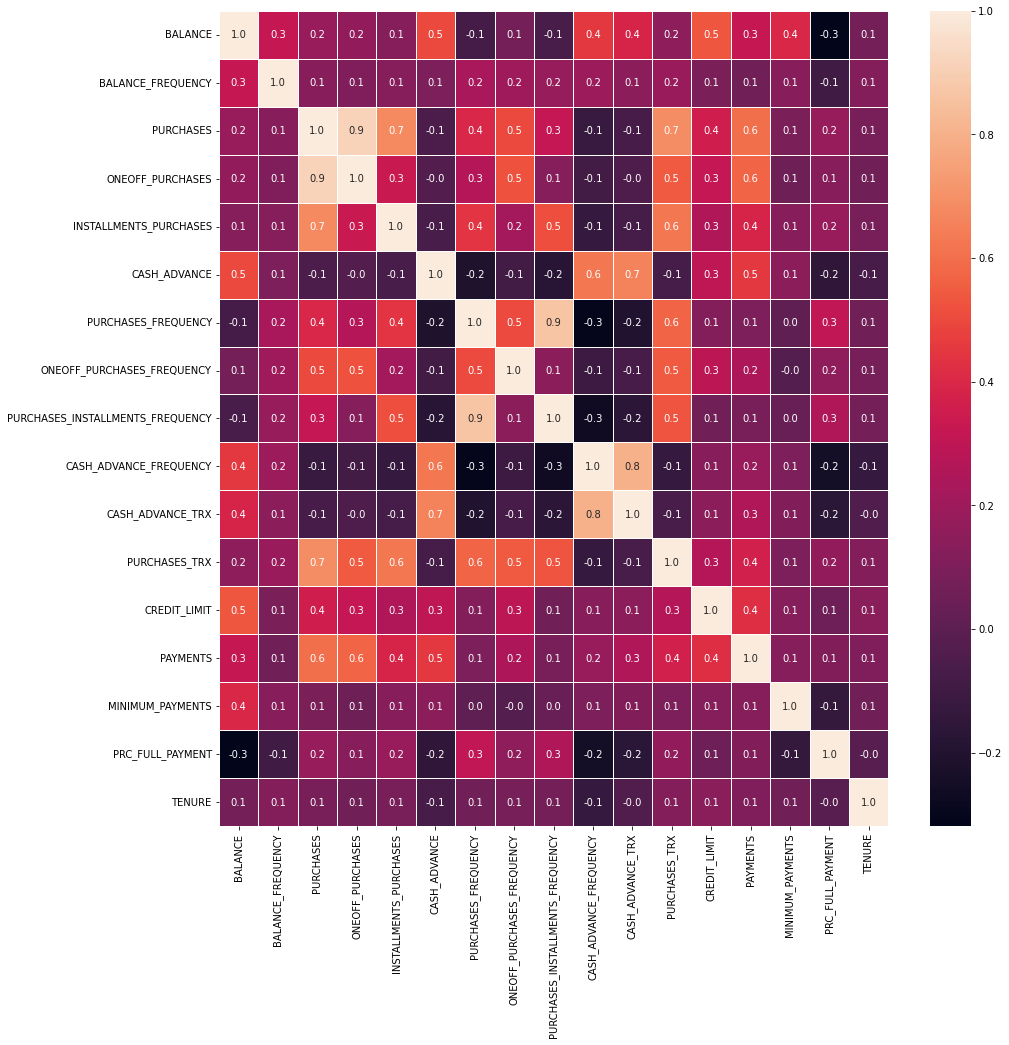

In [24]:
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

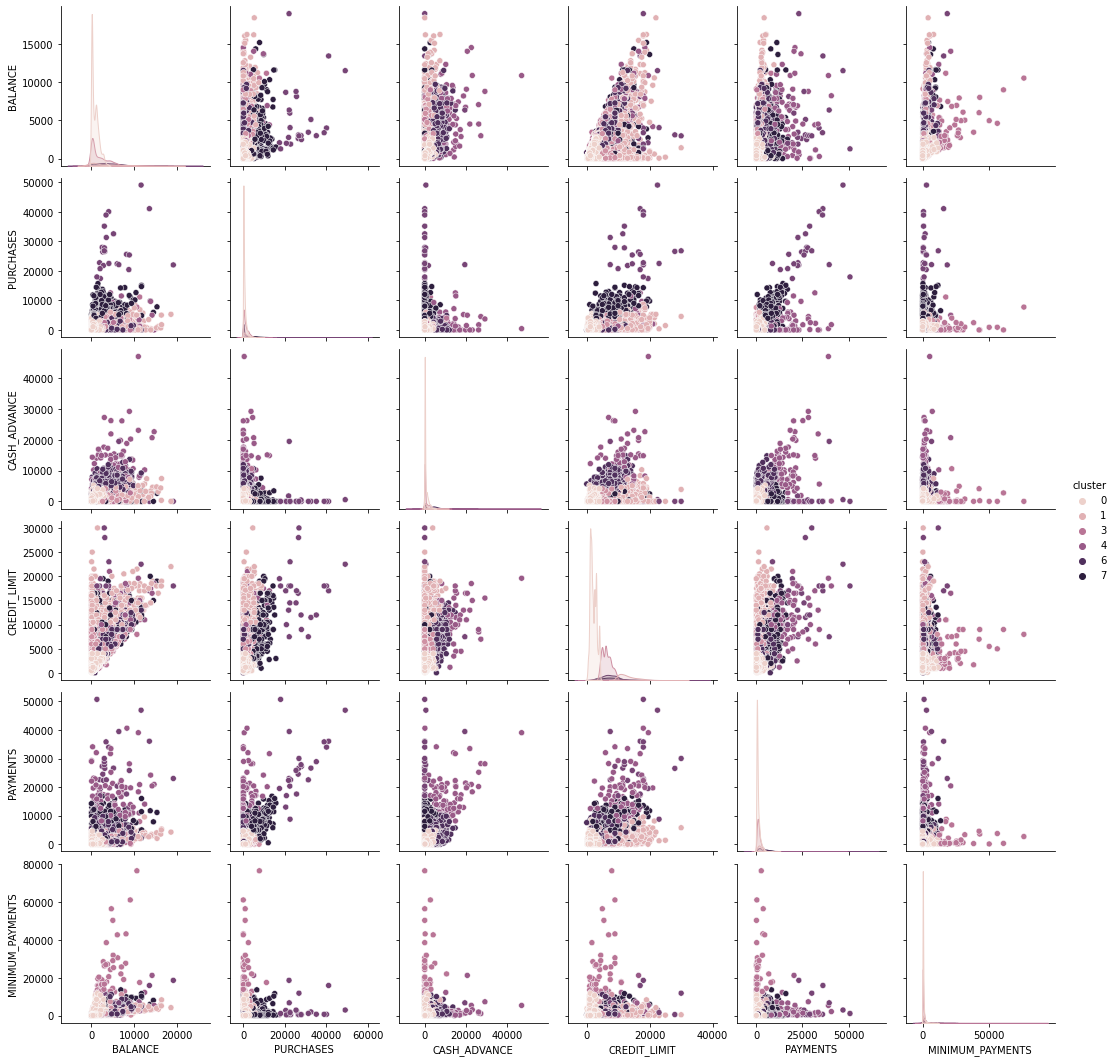

In [32]:
from sklearn.preprocessing import StandardScaler
standardscaler = StandardScaler()
X = standardscaler.fit_transform(data)

best_cols = ["BALANCE", "PURCHASES", "CASH_ADVANCE","CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS"]
kmeans = KMeans(n_clusters=8, init="k-means++", n_init=10, max_iter=300) 
best_vals = data[best_cols].iloc[ :, 1:].values
y_pred = kmeans.fit_predict( best_vals )

data["cluster"] = y_pred
best_cols.append("cluster")
sns.pairplot( data[ best_cols ], hue="cluster")

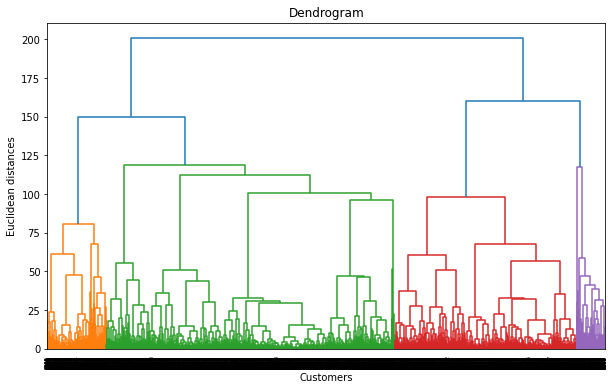

In [33]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

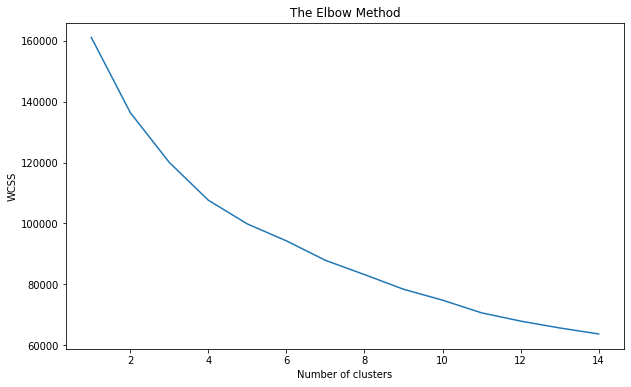

In [34]:
plt.figure(figsize=(10,6))
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 15), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()